In [1]:
import pandas as pd
final_df = pd.read_csv('../dataset/final_experiment_avg_df.csv')
final_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/final_experiment_avg_df.csv'

In [ ]:
final_df['smoothed_displacement'] *= 10000

# Convert 'Cycle_Number' and 'velocity' to integers
final_df['Cycle_Number'] = final_df['Cycle_Number'].astype(int)
final_df['velocity'] = final_df['velocity'].astype(int)

final_df


,id,velocity,Period,Cycle_Number,experiment_number,position,displacement,smoothed_displacement
0,0,160,300.65650,1772,4.5,0.0,0.000203,1.768432
1,1,160,601.11325,3009,4.5,0.0,0.000196,1.721037
2,2,160,901.65225,4246,4.5,0.0,0.000193,1.711072
3,3,160,1202.14075,5483,4.5,0.0,0.000195,1.731017
4,4,160,1502.75775,6721,4.5,0.0,0.000193,1.726035
...,...,...,...,...,...,...,...,...
1191,1191,380,19230.41400,188809,6.5,1.0,0.000232,2.050583
1192,1192,380,19530.91400,191746,6.5,1.0,0.000242,2.080247
1193,1193,380,19831.52350,194684,6.5,1.0,0.000237,2.070364
1194,1194,380,20132.34350,197626,6.5,1.0,0.000238,2.050576


In [58]:
X = final_df[['velocity', 'Cycle_Number']]
y = final_df['smoothed_displacement']

X, y

(      velocity  Cycle_Number
 0          160          1772
 1          160          3009
 2          160          4246
 3          160          5483
 4          160          6721
 ...        ...           ...
 1191       380        188809
 1192       380        191746
 1193       380        194684
 1194       380        197626
 1195       380        200568
 
 [1196 rows x 2 columns],
 0       1.768432
 1       1.721037
 2       1.711072
 3       1.731017
 4       1.726035
           ...   
 1191    2.050583
 1192    2.080247
 1193    2.070364
 1194    2.050576
 1195    2.080230
 Name: smoothed_displacement, Length: 1196, dtype: float64)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [60]:
X

array([[-1.21234857, -1.7307567 ],
       [-1.21234857, -1.70920895],
       [-1.21234857, -1.68766121],
       ...,
       [ 1.51129518,  1.62964625],
       [ 1.51129518,  1.68089399],
       [ 1.51129518,  1.73214174]])

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1

In [62]:
import tensorflow as tf

model_1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [64]:
epochs = 100
history = model_1.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=32)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6692 - mae: 1.5359 - val_loss: 1.8286 - val_mae: 1.2064
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5712 - mae: 1.0878 - val_loss: 1.0635 - val_mae: 0.8871
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8082 - mae: 0.7434 - val_loss: 0.5403 - val_mae: 0.6266
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4095 - mae: 0.5347 - val_loss: 0.2279 - val_mae: 0.3954
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1622 - mae: 0.3218 - val_loss: 0.1259 - val_mae: 0.2806
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1142 - mae: 0.2685 - val_loss: 0.1043 - val_mae: 0.2509
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0930 - mae: 0.2402 - val_loss: 0.0925 - val_mae: 0.2361
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0849 - mae: 0.2340 - val_loss: 0.0824 - val_mae: 0.2223
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.07

In [65]:
loss, mae = model_1.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Make predictions
predictions = model_1.predict(X_test[:5])
print("Predictions:", predictions.flatten())

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - mae: 0.0784
Test Loss: 0.0091, Test MAE: 0.0775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predictions: [1.7133026 1.5878986 2.2586732 2.2739305 1.6217428]


In [66]:
from sklearn.metrics import r2_score

# Get predictions on the test set
y_pred = model_1.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
R² Score: 0.9130


# Model 2

In [27]:
import tensorflow as tf

model_2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [29]:
epochs = 100
history = model_2.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=32)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.2153 - mae: 1.7605 - val_loss: 2.4370 - val_mae: 1.5255
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9889 - mae: 1.3661 - val_loss: 1.0623 - val_mae: 0.9644
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6988 - mae: 0.7299 - val_loss: 0.1650 - val_mae: 0.3396
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1395 - mae: 0.3088 - val_loss: 0.1110 - val_mae: 0.2674
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1086 - mae: 0.2653 - val_loss: 0.0997 - val_mae: 0.2541
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0921 - mae: 0.2399 - val_loss: 0.0874 - val_mae: 0.2371
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0833 - mae: 0.2332 - val_loss: 0.0753 - val_mae: 0.2198
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0727 - mae: 0.2190 - val_loss: 0.0651 - val_mae: 0.2020
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.05

In [30]:
loss, mae = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Make predictions
predictions = model_2.predict(X_test[:5])
print("Predictions:", predictions.flatten())

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - mae: 0.07857
Test Loss: 0.0096, Test MAE: 0.0792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predictions: [1.6824751 1.5788306 2.2984293 2.2649882 1.5884737]


In [31]:
from sklearn.metrics import r2_score

# Get predictions on the test set
y_pred = model_2.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
R² Score: 0.9082


# Visualization

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


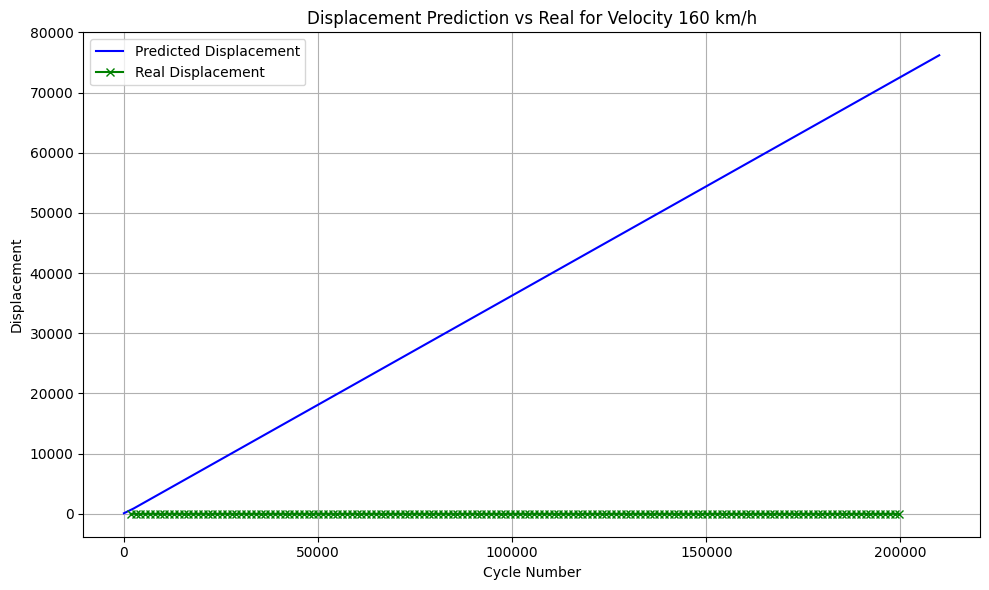

In [71]:
import matplotlib.pyplot as plt

def generate_and_plot_displacement(model, ground_truth_df, start_cycle, end_cycle, step_size, velocity):
    cycle_numbers = list(range(start_cycle, end_cycle + 1, step_size))
    new_data = pd.DataFrame({
        'velocity': [velocity] * len(cycle_numbers),
        'Cycle_Number': cycle_numbers
    })

    predicted_displacement = model.predict(new_data)

    ground_truth_filtered = ground_truth_df[
        (ground_truth_df['Cycle_Number'].between(start_cycle, end_cycle)) &
        (ground_truth_df['velocity'] == velocity)
    ]
    
    plt.figure(figsize=(10, 6))
    plt.plot(cycle_numbers, predicted_displacement, label='Predicted Displacement', color='blue', marker='')
    
    plt.plot(ground_truth_filtered['Cycle_Number'], ground_truth_filtered['smoothed_displacement'], 
             label='Real Displacement', color='green', marker='x')
    
    plt.xlabel('Cycle Number')
    plt.ylabel('Displacement')
    plt.title(f'Displacement Prediction vs Real for Velocity {velocity} km/h')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


generate_and_plot_displacement(model_2, final_df[final_df['position'] == 1], start_cycle=0, end_cycle=210473, step_size=2500, velocity=160)


In [74]:
import pandas as pd

# Generate test data for `Cycle_Number` from 0 to 50,000 with a step of 1,000 and `velocity` 160
cycle_numbers = list(range(0, 200001, 1000))
test_data = pd.DataFrame({
    'velocity': [160] * len(cycle_numbers),
    'Cycle_Number': cycle_numbers
})

# Scale the test data using the same scaler used for training
test_data_scaled = scaler.transform(test_data)

# Make predictions
predicted_displacement = model_1.predict(test_data_scaled)

# Combine predictions with test data for easy reference
test_data['predicted_smoothed_displacement'] = predicted_displacement.flatten()

# Display the first few rows of predictions
print(test_data)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     velocity  Cycle_Number  predicted_smoothed_displacement
0         160             0                         1.770514
1         160          1000                         1.767703
2         160          2000                         1.764892
3         160          3000                         1.762082
4         160          4000                         1.759271
..        ...           ...                              ...
196       160        196000                         1.588010
197       160        197000                         1.589193
198       160        198000                         1.590587
199       160        199000                         1.592599
200       160        200000                         1.594611

[201 rows x 3 columns]


In [75]:
import numpy as np
average_difference = int(final_df['Cycle_Number'].diff().mean())

# Generate new Cycle_Number values with constant frequency
final_df['Cycle_Number'] = final_df['Cycle_Number'].iloc[0] + np.arange(len(final_df)) * average_difference
